# Setup libraries

In [ ]:
'''
jupyter
tensorflow
tensorflow_datasets
tensorflow_hub
matplotlib
sklearn
numpy
requests
PILLOW
opencv-python
'''

In [3]:
%pip install tensorflow

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 857.0 kB/s eta 0:00:00 0:00:01
  Using cached charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (33 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 5.8 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 923.2 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.4 MB/s et

In [6]:
%pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


# Main 

In [4]:
import tensorflow as tf
print(tf.__version__)

2024-07-17 23:08:10.759649: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Let's create noisy data (100 points) in form of `m * X + b = Y`:

In [8]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y

In [9]:
X, Y = make_noisy_data()

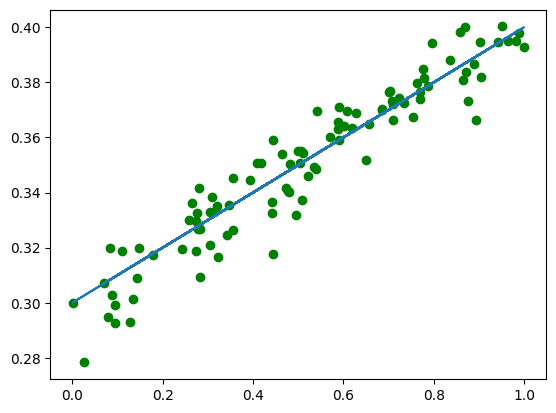

In [10]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

In [11]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.5715343 , 0.50435877, 0.7036805 , 0.31012392, 0.8899878 ,
       0.49463344, 0.09491885, 0.9023701 , 0.96432316, 0.2733816 ,
       0.5115565 , 0.5354364 , 0.13409197, 0.30521727, 0.9430847 ,
       0.8926923 , 0.6857115 , 0.47739577, 0.86527205, 0.5005927 ,
       0.06922436, 0.4797243 , 0.60748017, 0.6005701 , 0.62849367,
       0.8758054 , 0.44538057, 0.50607216, 0.472139  , 0.7623633 ,
       0.46538007, 0.41877317, 0.27827358, 0.9998113 , 0.3474797 ,
       0.98333323, 0.30460227, 0.9896283 , 0.48160398, 0.7769458 ,
       0.768955  , 0.08864224, 0.5388036 , 0.90430236, 0.00170922,
       0.02701509, 0.5228821 , 0.58883464, 0.83517134, 0.9504601 ,
       0.31394172, 0.08446801, 0.7090179 , 0.34234226, 0.7076651 ,
       0.73483765, 0.28368104, 0.2750473 , 0.08003438, 0.86848485,
       0.24250388, 0.14842594, 0.7233566 , 0.12718964, 0.58885014,
       0.710636  , 0.75361705, 0.26509416, 0.44503593, 0.27400506,
       0.85821

(array([14., 21., 27., 22., 16.]),
 array([0.00170922, 0.20132963, 0.40095004, 0.60057044, 0.80019087,
        0.99981129]),
 <BarContainer object of 5 artists>)

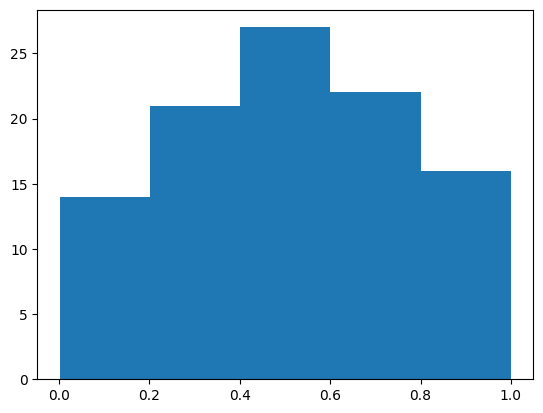

In [12]:
plt.hist(X, bins=5)

In [13]:
w = tf.Variable(0.)
b = tf.Variable(0.)

In [14]:
def predict(x):
    y = w * x + b
    return y

In [15]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [16]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.12386814


In [17]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.123868
Step 20, Loss 0.000696
Step 40, Loss 0.000168
Step 60, Loss 0.000149
Step 80, Loss 0.000135
Step 100, Loss 0.000124
Step 120, Loss 0.000115
Step 140, Loss 0.000108
Step 160, Loss 0.000102
Step 180, Loss 0.000097


In [18]:
print("After {} steps we learned that w={} and b={}".format(steps, w.numpy(), b.numpy()))

After 200 steps we learned that w=0.11998080462217331 and b=0.2882080376148224


In [19]:
print(w.numpy(), b.numpy())

0.119980805 0.28820804


In [20]:
w.numpy(), b.numpy()

(0.119980805, 0.28820804)

In [21]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.119980805>

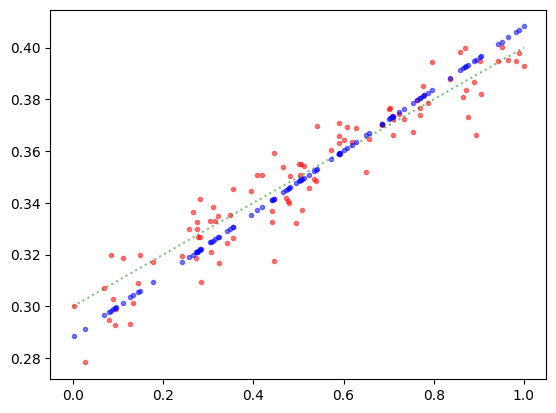

In [22]:
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

Step 0, Loss 0.000094
Step 20, Loss 0.000093
Step 40, Loss 0.000092
Step 60, Loss 0.000092
Step 80, Loss 0.000091
Step 100, Loss 0.000091
Step 120, Loss 0.000090
Step 140, Loss 0.000090
Step 160, Loss 0.000089
Step 180, Loss 0.000089


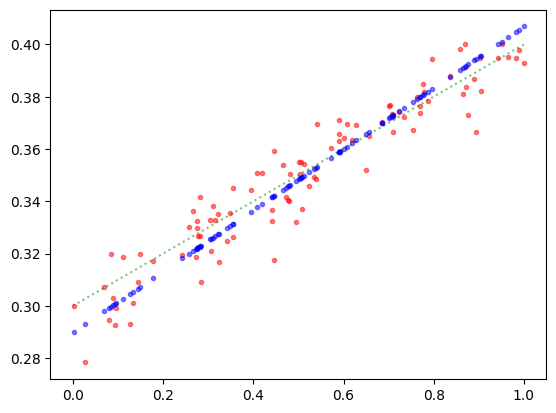

In [23]:
learning_rate = 0.01
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))
        
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

In [24]:
min_loss = mean_squared_error(0.1*X+0.3, Y)
print("Minimum loss", min_loss.numpy())

Minimum loss 8.165252e-05


In [25]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0012832693>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.00070242584>]

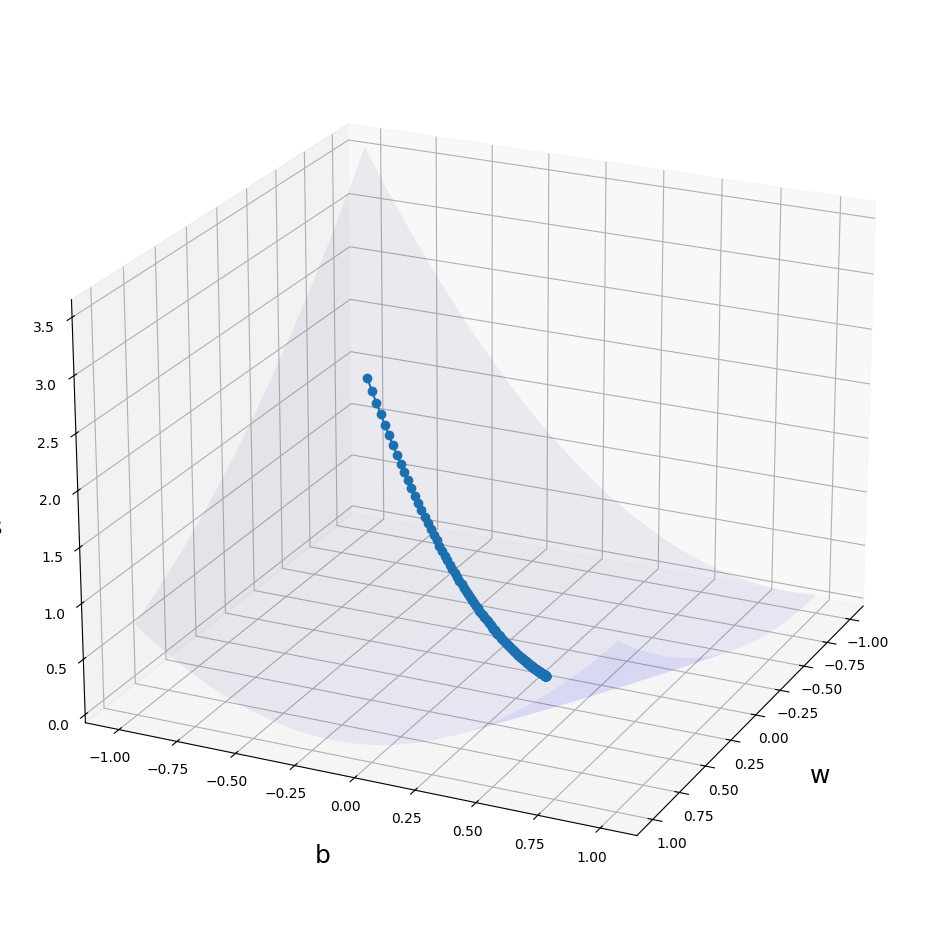

In [26]:
import numpy as np

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()